In [1]:
# https://www.youtube.com/watch?v=wQ8BIBpya2k
# pip install h5py

import tensorflow as tf
import h5py
import cv2
import numpy as np 
import matplotlib.pyplot as plt

num_model = tf.keras.models.load_model('epic_num_reader.model')


/home/isaiah/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/isaiah/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/isaiah/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/isaiah/anaconda3/envs/tf/lib/python3.6/site-packages

In [2]:
drawing = False # true if mouse is pressed
pt1_x , pt1_y = None , None
line_thickness = 16

# mouse callback function
def line_drawing(event,x,y,flags,param):
    global pt1_x,pt1_y,drawing

    if event==cv2.EVENT_LBUTTONDOWN:
        drawing=True
        pt1_x,pt1_y=x,y

    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.line(img,(pt1_x,pt1_y),(x,y),color=(0,0,0),thickness=line_thickness)
            pt1_x,pt1_y=x,y
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False
        cv2.line(img,(pt1_x,pt1_y),(x,y),color=(0,0,0),thickness=line_thickness)        

def img_2_array(img):
    height = img.shape[0]
    width = img.shape[1]
    channels = img.shape[2]
    if channels == 3:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
    array = np.zeros([height, width])
    print(type(array))
    
    # array[:] = img[:]
    for i in range(0, height):
        for j in range(0, width):
            array[i][j] = img[i][j]
            
    return array


# img = np.zeros((256,256,3), np.uint8)
# img[:] = (255,255,255)

# ar = img_2_array(img)
# print(len(ar))

<class 'numpy.ndarray'>


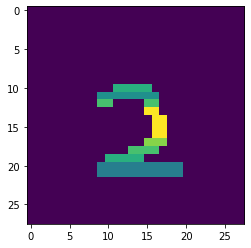

1
<class 'numpy.ndarray'>


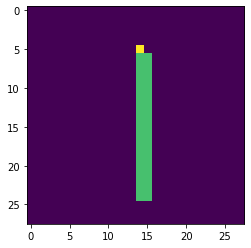

1
<class 'numpy.ndarray'>


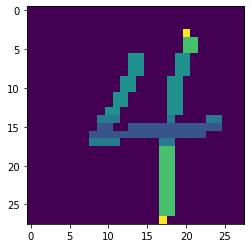

4
<class 'numpy.ndarray'>


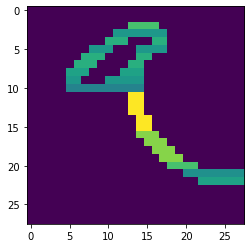

3
<class 'numpy.ndarray'>


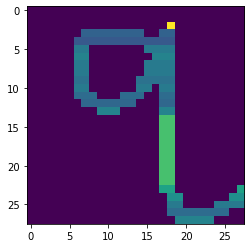

3
<class 'numpy.ndarray'>


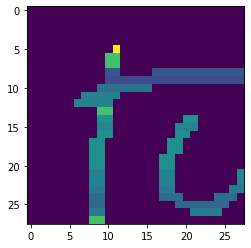

5
<class 'numpy.ndarray'>


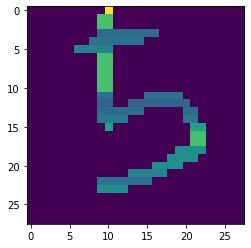

5
<class 'numpy.ndarray'>


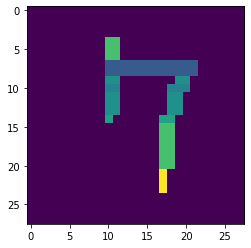

9
<class 'numpy.ndarray'>


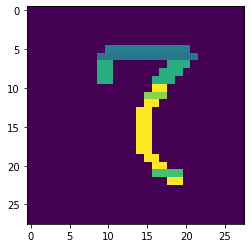

1
<class 'numpy.ndarray'>


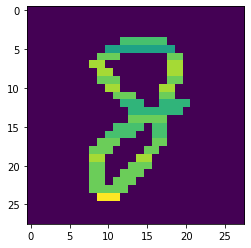

8
<class 'numpy.ndarray'>


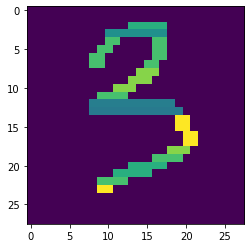

3
<class 'numpy.ndarray'>


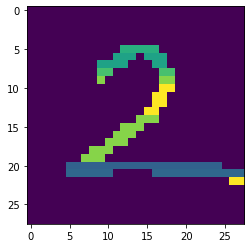

2
<class 'numpy.ndarray'>


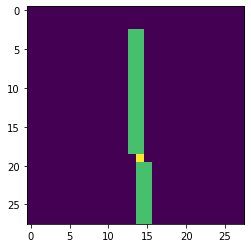

1
<class 'numpy.ndarray'>


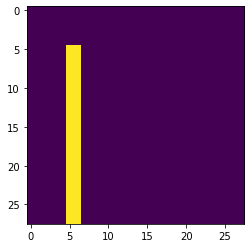

7
<class 'numpy.ndarray'>


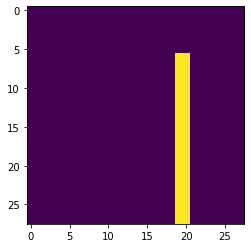

9
<class 'numpy.ndarray'>


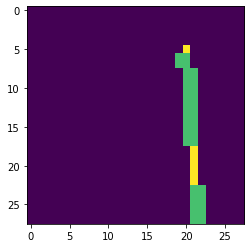

4


In [4]:

        
img = np.zeros((256,256,3), np.uint8)
img[:] = (255,255,255)
cv2.namedWindow('Number draw')
cv2.setMouseCallback('Number draw',line_drawing)

while(1):
    cv2.imshow('Number draw',img)
    key_in = cv2.waitKey(1) & 0xFF
    if key_in == 27:    # esc
        break
    elif key_in == 13:    #enter
        
        plt.cla()
    # run the desired code
        # change size to 24x24
        img_resize = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
        # inver its value black-->0 ; white--> 255
        ret, img_resize = cv2.threshold(img_resize,127,255,cv2.THRESH_BINARY_INV)
        img_array = img_2_array(img_resize)
        img_array = tf.keras.utils.normalize(img_array, axis=1)
        plt.imshow(img_array)
        plt.show()
#         print(img_array.shape)
        predictions = num_model.predict([[img_array]]) # predictions always a list
        print(np.argmax(predictions[0]))
        img[:] = (255,255,255)
        
cv2.destroyAllWindows()

In [ ]:
predictions = num_model.predict([x_test]) #predictions always a list